### Deep Learning Lab -- Forward Propagate A Dataset Built With Images

In this lab you'll forward propagate using a dataset that contains digits of handwritten digits.  

Your neural network will have the following qualities to it:

 - An input layer
 - two hidden layers, one with 5 neurons, and one with 10
 - an output layer that has 10 predicted classes of outcomes

#### Step 1:  Load in the MNIST Dataset

In [ ]:
from keras.datasets import mnist
(train_img, train_label), (test_img, test_label) = mnist.load_data()

#### Step 2:  Check the shape of your training images, and look at the first item.

In [21]:
train_img.shape

(60000, 28, 28)

In [27]:
train_img[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Step 3).  Try using the imshow() method in matplotlib to see what the image looks like

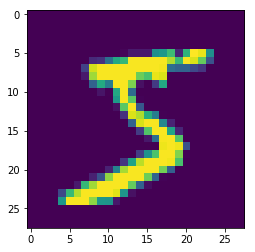

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_img[0])

#### Try looking at a few more to see what they look like.  Also look at the training labels to see their corresponding identity.

In [28]:
train_img[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

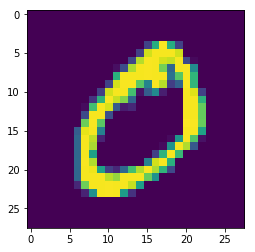

In [30]:
plt.imshow(train_img[1]);

**How many unique labels are there?**

#### Step 4).  To make this a little bit easier, let's just use the first 100 images of the dataset, so computation doesn't take too long.

In [31]:
# create a new variable that's the first 100 images of the training set along with their labels
X, y = train_img[:100], train_label[:100]

#### Standardize by dividing the training set by 255

In [33]:
X = X/255

In [34]:
X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Any idea why we'd do this instead of traditional standardization?**

#### Step 5).  Reshape your data so that it's two dimensional:  100X784

In [39]:
X = X.reshape(100, 784)

#### Step 6). Initialize a hidden unit with 10 neurons

In [42]:
import numpy as np
hidden_unit = np.random.normal(0, 0.1, 7840).reshape(784, 10)

#### Step 7).  Use the dot() method to matrix multiply your input and hidden layer.  Apply the Relu activation function afterwards.

In [48]:
hidden_output = X.dot(hidden_unit)
hidden_output = np.maximum(0, hidden_output)
hidden_output[:10]

array([[0.        , 0.        , 0.80965329, 0.        , 0.941259  ,
        0.69954103, 0.33685245, 0.19009936, 0.        , 0.        ],
       [0.        , 0.69774296, 1.38755021, 0.        , 1.58349856,
        0.19207158, 0.        , 2.1933098 , 0.        , 0.        ],
       [0.        , 0.        , 1.11790844, 0.        , 0.        ,
        0.54085402, 0.55922456, 1.20845144, 0.01517181, 0.71556843],
       [0.        , 0.        , 0.        , 0.19587828, 0.        ,
        0.        , 0.24835699, 0.48736239, 0.        , 0.63303991],
       [0.49915521, 0.01337378, 0.43292537, 0.        , 1.33287714,
        0.        , 1.6125302 , 0.70703325, 0.        , 0.49312821],
       [0.58144999, 0.        , 1.88653116, 0.        , 0.32070903,
        0.        , 0.8266759 , 1.0568005 , 0.        , 0.78820306],
       [0.        , 0.        , 1.1571749 , 0.50938122, 0.86386425,
        0.        , 0.        , 0.        , 0.14381585, 0.84653539],
       [0.58373229, 0.        , 1.6088137

The shape of your output should be 100 x 10.

#### Step 8:  Initialize another hidden layer with 5 neurons.

In [50]:
second_hidden_unit = np.random.normal(0, 0.1, 50).reshape(10, 5)
second_output = hidden_output.dot(second_hidden_unit)

In [52]:
second_output = np.maximum(0, second_output)

array([[0.12873462, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.13876328, 0.        , 0.12015325],
       [0.        , 0.        , 0.19529984, 0.        , 0.25625327],
       [0.        , 0.        , 0.14305237, 0.        , 0.22542626],
       [0.24674127, 0.        , 0.4045564 , 0.        , 0.19395395],
       [0.03283155, 0.        , 0.29430981, 0.        , 0.2338355 ],
       [0.14260098, 0.        , 0.03225666, 0.        , 0.07894968],
       [0.        , 0.        , 0.2356956 , 0.        , 0.52574451],
       [0.15175634, 0.        , 0.05513654, 0.        , 0.        ],
       [0.13539989, 0.        , 0.26119739, 0.        , 0.19761929],
       [0.        , 0.        , 0.12525909, 0.        , 0.2748081 ],
       [0.2749113 , 0.        , 0.33075924, 0.        , 0.46551478],
       [0.11436085, 0.        , 0.07750161, 0.        , 0.34997973],
       [0.        , 0.        , 0.13291762, 0.        , 0.14554738],
       [0.29098843, 0.        , 0.

#### Step 9:  Matrix multiply the output from your last layer, and activate it with ReLu.

#### Step 10:  Create Your Output Layer With 10 Predicted Answers

In [53]:
output_layer = np.random.normal(0, 0.1, 50).reshape(5, 10)

#### Step 11:  Matrix multiply your last hidden layer with your hidden layer, and apply the sigmoid function

In [54]:
final_output = second_output.dot(output_layer)

In [55]:
final_output.shape

(100, 10)

In [57]:
final_output[0]

array([ 3.04874388e-02, -3.65175080e-03,  1.93204864e-03, -1.41958308e-02,
       -6.91814764e-05,  1.02047974e-02,  9.48091888e-03, -8.31563781e-03,
       -3.41105396e-03, -7.25057569e-03])

#### Step 12:  Create your prediction by choosing the column in your output layer with the highest overall value.

In [58]:
from scipy.special import expit

In [61]:
final_preds = expit(final_output)

In [62]:
final_preds[:3]

array([[0.50762127, 0.49908706, 0.50048301, 0.4964511 , 0.4999827 ,
        0.50255118, 0.50237021, 0.4979211 , 0.49914724, 0.49818736],
       [0.49818089, 0.4981785 , 0.48960509, 0.4942753 , 0.50011901,
        0.50278974, 0.4967798 , 0.5035628 , 0.49850836, 0.50028299],
       [0.49663316, 0.49611954, 0.48155771, 0.49080915, 0.49777982,
        0.50801967, 0.49604769, 0.50492332, 0.49586434, 0.49948681]])

In [65]:
final_predictions = np.argmax(final_preds, axis=1)

In [66]:
final_predictions

array([0, 7, 5, 5, 0, 7, 0, 5, 0, 5, 5, 5, 5, 5, 0, 7, 5, 7, 5, 7, 5, 5,
       0, 5, 0, 5, 5, 5, 7, 0, 7, 5, 5, 7, 7, 5, 7, 7, 0, 5, 0, 7, 0, 0,
       5, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 0, 5, 7, 7, 5, 5,
       0, 5, 0, 7, 5, 7, 0, 7, 5, 0, 5, 5, 5, 7, 7, 7, 5, 0, 7, 5, 0, 7,
       0, 5, 7, 5, 5, 0, 0, 7, 0, 7, 5, 5], dtype=int64)